<a href="https://colab.research.google.com/github/johnny080524/Assigement/blob/master/Machine_Learning_Spring_32513_A2_ShenChuan_Lin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Spring 32513
13432772
SHEN-CHUAN LIN



# Introduction
The report uses the dataset which is crime incident reports are provided by the Boston Police Department. The data is collected by the crime incident report system which recorded the type of incident and where and when did incidents happen. The problems the article wants to analyze shows below:
1.	What kinds of crimes are most common?
2.	Where did the crime happen?
3.	When did the crime occur?
4.	After finding out the frequency of the crime, and does its frequency changed over a day, week, or month?
The first question defines the majority type of crimes, which can figure out the reason for the crime. The second question, the location detail helps police to predict the next crimes might happen in the place that has been secured to prevent the crime. The third question, the time data illustrates that the maximum probability in the specific time range the crime might happen. The accurate time increases the probability of prediction that raises the efficiency of crime prevention. The result from the question above demonstrates what, where, and when the crime occurred that the accurate estimation of the location might have the highest chance for the crime happened. However, the crime rate could change by the time, which has a high peak and a low peak in a year. The last question aims to analyze the peak of the crime to enhance the efficiency of crime prevention for the Boston Police Department.





In [0]:
!pip install pydrive

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1klqK7DKGadwCn1EhwHiroubCsBziKaEw' 
# The shareable link
fluff, id = link.split('=')
print (id) 
# Verify that you have everything after '='

1klqK7DKGadwCn1EhwHiroubCsBziKaEw


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('crime.csv')  
df3 = pd.read_csv('crime.csv')
# Dataset is now stored in a Pandas Dataframe
df3.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018/9/2 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018/8/21 00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018/9/3 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018/9/3 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018/9/3 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018/9/3 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018/9/3 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018/9/3 20:39,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018/9/3 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018/9/3 20:38,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [0]:
df3['REPORTING_AREA'].value_counts()


       20250
111     2372
186     2016
329     1878
117     1832
143     1775
624     1751
26      1747
465     1650
130     1423
257     1412
427     1400
134     1389
428     1386
177     1371
520     1344
900     1317
914     1301
444     1239
796     1235
304     1233
355     1213
112     1179
282     1175
28      1168
102     1162
171     1154
319     1153
572     1150
326     1121
       ...  
738       25
599       24
917       24
277       23
708       23
737       23
654       22
471       20
744       20
923       20
927       20
960       19
505       19
659       18
926       18
819       18
684       18
742       18
671       17
740       17
690       17
689       15
386       14
0         13
699       12
665       12
669       11
745        7
190        5
950        1
Name: REPORTING_AREA, Length: 879, dtype: int64

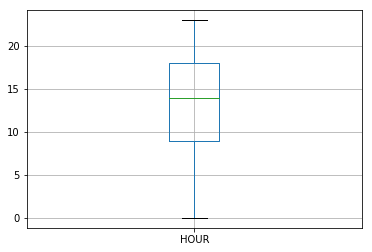

In [0]:
df3.boxplot(column='HOUR')

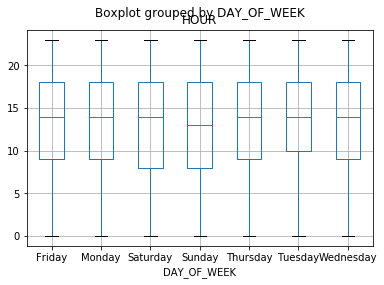

In [0]:
df3.boxplot(column='HOUR', by = 'DAY_OF_WEEK')

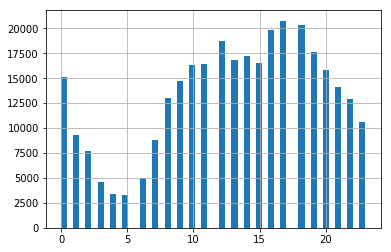

In [0]:
df3['HOUR'].hist(bins=50)

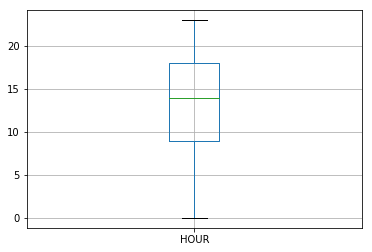

In [0]:
df3.boxplot(column='HOUR')

In [0]:
data = pd.read_csv("crime.csv", index_col="INCIDENT_NUMBER")



def num_missing(x):
  return sum(x.isnull())

#Apply per column:
print("missing values per column:")
print (data.apply(num_missing, axis=0))
#axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nmissing values per row:")
print (data.apply(num_missing, axis=1)).head()
#axis=1 defines that function is to be applied on each row

missing values per column:
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

missing values per row:
INCIDENT_NUMBER
I182070945       1
I182070943       1
I182070941       1
I182070940       1
I182070938       1
I182070936       1
I182070933       1
I182070932       1
I182070931       1
I182070929       1
I182070928       1
I182070927       1
I182070923       1
I182070922       1
I182070921       1
I182070920       3
I182070919       1
I182070918       1
I182070917       1
I182070915       1
I182070913       2
I182070911       1
I182070910       1
I1

AttributeError: ignored